# **[Problem 1] Understanding the content of the competition**

*The competition's overview page and report what the "Home Credit Default Risk" competition looks like from the following perspectives*

**What kind of company is Home Credit?**</br> 
Home Credit - This is a non-banking financial institution, which was founded in 1997 in Czech Republic.</br> 

This company operates in 14 different countries (including United States, Russia, Kazahstan, Belarus, China, India) and focuses on lending primarily to people with little or no credit history who may either not obtain loans or became victims of untrustworthly lenders.</br> 

This group has over 29 million customers, total assests of 21 billions Euro, over 160 millions loansand with the majority in Asia and and almost half of them in China (as of 19-05-2018)</br> 

They are like a Micro-Finance company() that gives or grant loan which strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience</br> 

**What is expected in this competition?**</br>
Proper preditions are to be made with the uses of a variety of alternative data - including telco and transactional information in other to know how capable each applicant is of repaying a loan. </br>

**What are the benefits companies can gain by predicting this**</br>
This will help them unlock the full potential of their data. And also will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.


# **[Problem 2] Understanding the overview of data**

**By loading the data**

In [4]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

application = pd.read_csv("application_train.csv")

**This is an Overview of the Data**

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**The head function returns the object with the desired number of rows.**

In [6]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139749 entries, 0 to 139748
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(67), int64(39), object(16)
memory usage: 130.1+ MB


**The .info() method allows us to learn the shape of object types of our data**

In [7]:
application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,139749.000000,139749.000000,139749.000000,1.397490e+05,1.397490e+05,139741.000000,1.396320e+05,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,47440.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139748.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,60993.000000,1.394430e+05,112099.000000,68757.000000,57956.000000,71553.00000,46900.000000,42148.000000,65165.000000,69338.000000,70171.000000,...,69338.000000,70171.000000,44990.000000,56781.000000,44226.000000,69542.000000,42784.000000,62568.000000,72228.000000,139285.000000,139285.000000,139285.000000,139285.000000,139748.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139749.000000,139748.000000,139748.000000,120980.000000,120980.000000,120980.000000,120980.000000,120980.000000,120980.000000
mean,181054.893087,0.081425,0.418121,1.690226e+05,5.990023e+05,27100.653917,5.383510e+05,0.020845,-16027.399745,63677.325376,-4982.251107,-2992.967628,12.023124,0.999993,0.820256,0.199930,0.997953,0.279050,0.056501,2.155616,2.054083,2.033167,12.060609,0.014977,0.050262,0.039936,0.078233,0.230449,0.179014,0.502129,5.136619e-01,0.510411,0.117071,0.088379,0.97752,0.751622,0.044660,0.077959,0.149918,0.225322,...,0.149377,0.224976,0.230910,0.066962,0.101495,0.108135,0.008815,0.027982,0.102101,1.423858,0.142743,1.407050,0.099164,-961.965574,0.000043,0.712027,0.000129,0.015156,0.087285,0.000215,0.080251,0.003785,0.000021,0.004157,0.000007,0.003485,0.002998,0.001116,0.009961,0.000236,0.008243,0.000587,0.000522,0.000336,0.006373,0.006985,0.033700,0.267557,0.264242,1.888758
std,46784.820356,0.273487,0.720651,3.292682e+05,4.025977e+05,14557.386409,3.698579e+05,0.013806,4369.225331,141156.207321,3525.341283,1510.790702,11.861364,0.002675,0.383975,0.399949,0.045192,0.448534,0.230888,0.909474,0.510384,0.503723,3.263770,0.121460,0.218485,0.195809,0.268539,0.421122,0.383365,0.211414,1.918125e-01,0.195034,0.107795,0.082166,0.06048,0.113691,0.076926,0.133347,0.100119,0.144485,...,0.100434,0.144976,0.161879,0.081466,0.093213,0.111708,0.048132,0.069024,0.107196,2.321793,0.440885,2.302196,0.357711,826.764788,0.006552,0.452820,0.011348,0.122173,0.282253,0.014650,0.271682,0.061409,0.004633,0.064344,0.002675,0.058930,0.054674,0.033392,0.099

**The describe() function is used for generating descriptive statistics of a dataset.**

*   This mean, it gives us summary statistics for numerical columns in our DataFrame



In [8]:
application.count()

SK_ID_CURR                    139749
TARGET                        139749
NAME_CONTRACT_TYPE            139749
CODE_GENDER                   139749
FLAG_OWN_CAR                  139749
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     120980
AMT_REQ_CREDIT_BUREAU_WEEK    120980
AMT_REQ_CREDIT_BUREAU_MON     120980
AMT_REQ_CREDIT_BUREAU_QRT     120980
AMT_REQ_CREDIT_BUREAU_YEAR    120980
Length: 122, dtype: int64

**The pandas count() function helps in counting non-NA cells of each column or row.**

**This is to check missing data or values**

In [12]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data(application).head(10)

,Total,Percent
COMMONAREA_MEDI,97601,69.840214
COMMONAREA_AVG,97601,69.840214
COMMONAREA_MODE,97601,69.840214
NONLIVINGAPARTMENTS_MODE,96965,69.385112
NONLIVINGAPARTMENTS_MEDI,96965,69.385112
NONLIVINGAPARTMENTS_AVG,96965,69.385112
LIVINGAPARTMENTS_MEDI,95523,68.353262
LIVINGAPARTMENTS_MODE,95523,68.353262
LIVINGAPARTMENTS_AVG,95523,68.353262
FONDKAPREMONT_MODE,95487,68.327501


* Number of columns with missing values or data

In [13]:
application.isnull().any(axis=0).sum()

69

* Number of rows with missing values or data

In [14]:
application.isnull().any(axis=1).sum()

135838

* Draw a graph showing the percentage of classes

In [18]:
X = application.drop(['TARGET'], axis=1)
y  = application.loc[:, 'TARGET']

y.value_counts()

0    128370
1     11379
Name: TARGET, dtype: int64

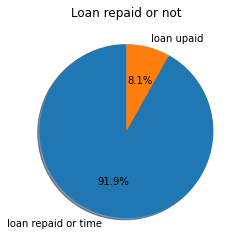

In [19]:
label_counts = y.value_counts()
labels = 'loan repaid or time', 'loan upaid'

plt.title("Loan repaid or not")
plt.pie(label_counts, labels=labels, autopct='%.1f%%', shadow=True, startangle=90)
plt.show()

**TARGET value 0 means loan is repayed, value 1 means loan is not repayed**

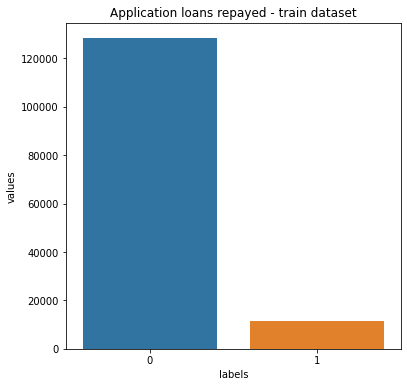

In [20]:
temp = application["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

# **[Problem 3] Defining issues**

* **Please set multiple issues / questions of your own based on the overview of the data.**

1. Is the client single or married and/or civil marriage?
2. Does the clients have children?
3. What is the Educational Level of the clients?
4. Does applicants for credits registered their housing as
5. House/apartmen?
6. What is the type of income of the clients?
7. On which day of the week did the client apply for the loan?
8. Does the client owns a car or real estate?
9. What is the clients gender?
10. Which type of loan did the clients took?
11. How much loan did the clients take?
12. What is the Normalized population of region where client lives ?
13. How many family members does the clients have?
14. Who was accompanying client when he was applying for the loan?
15. How many rooms are in the house?
16. On which day of the week did the client apply for the loan?
17. Does the clients have a job?
18. What is the job/organization type of the clients?
19. What is the Days from birth distribution of the clients?
20. What is the distribution of total income for the clients?
21. What is the Clients income type (businessman, working, maternity leave,�)?
22. Approximately at what hour did the client apply for the loan?
23. In what year the house was built?
24. How many observation of client's social surroundings 
25. with observable 30 DPD ?
26. How many days before application did client change phone?
27. Did client provide documents ?

# **[Problem 4] Data exploration**

* **Which type of loan did the clients took?**

Let's see the type of the loans taken and also, on a separate plot, the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan)

In [22]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [23]:
def plot_distribution(var):
    
    i = 0
    t1 = application.loc[application['TARGET'] != 0]
    t0 = application.loc[application['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

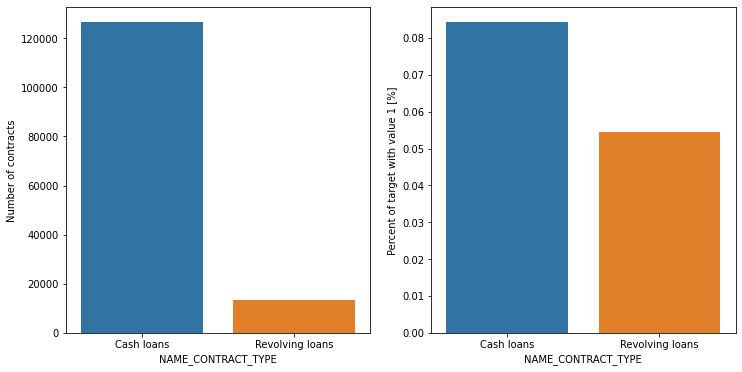

In [24]:
plot_stats('NAME_CONTRACT_TYPE')

* **Does the clients have children?**

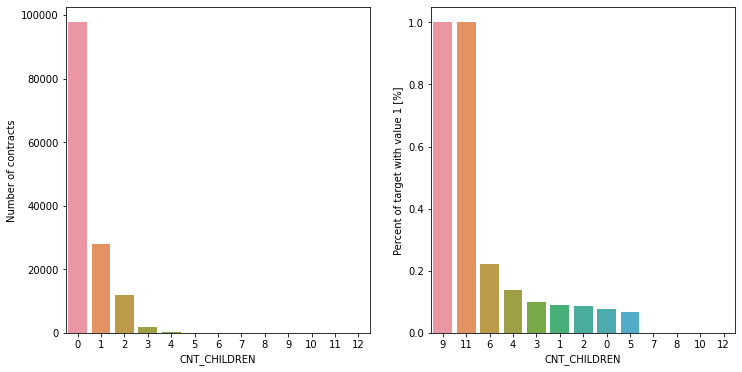

In [25]:
plot_stats('CNT_CHILDREN')

* **Does the client owns a car or real estate?**

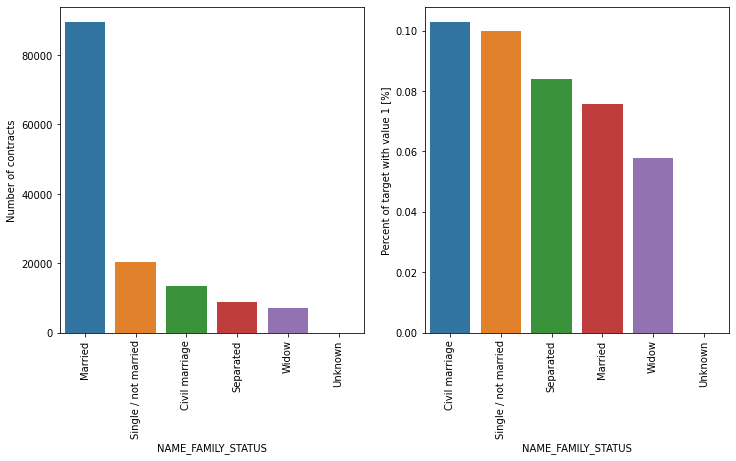

In [26]:
plot_stats('NAME_FAMILY_STATUS',True, True)

* **What is the Educational of the clients?**



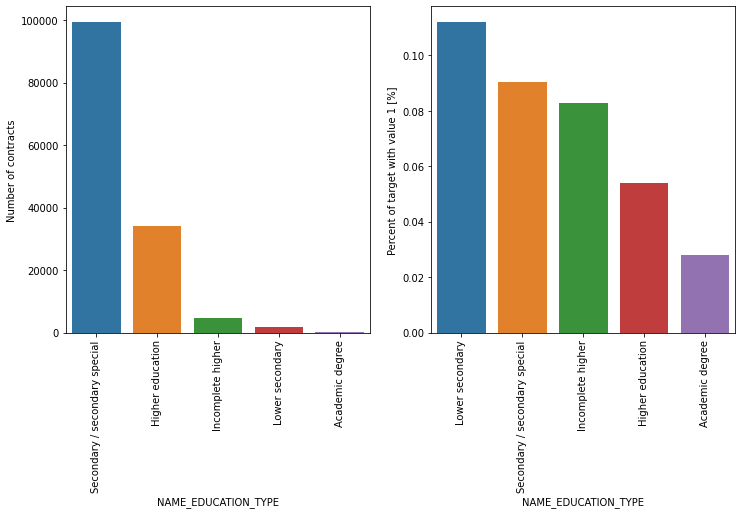

In [27]:
plot_stats('NAME_EDUCATION_TYPE',True)


* **Does applicants for credits registered their housing as House/apartmen?**

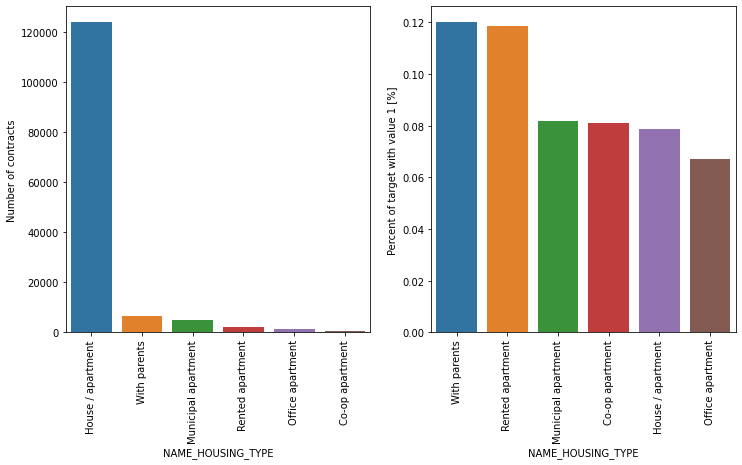

In [28]:
plot_stats('NAME_HOUSING_TYPE',True)

* **Does the client owns a car or real estate?**

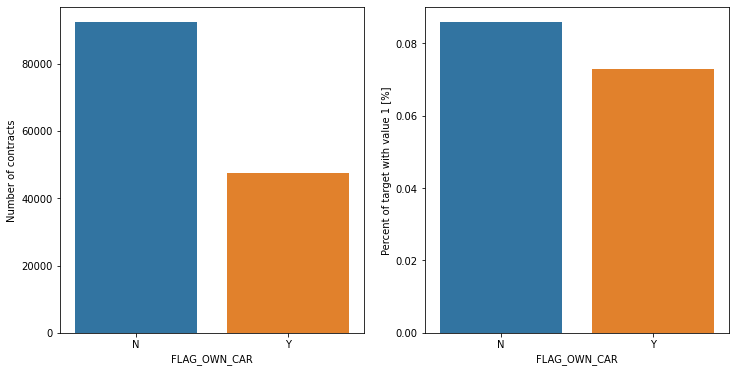

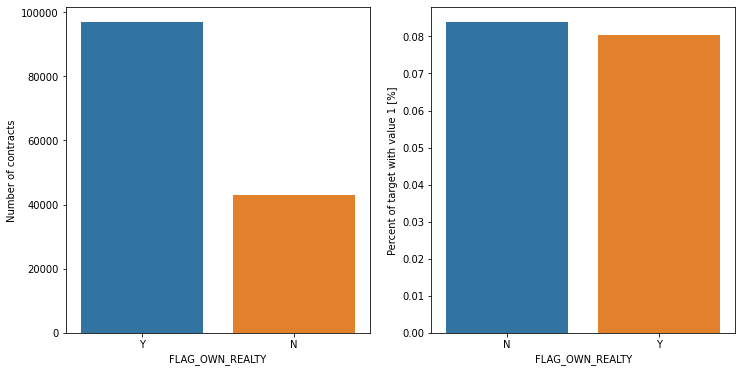

In [29]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

* **What is the clients gender?**

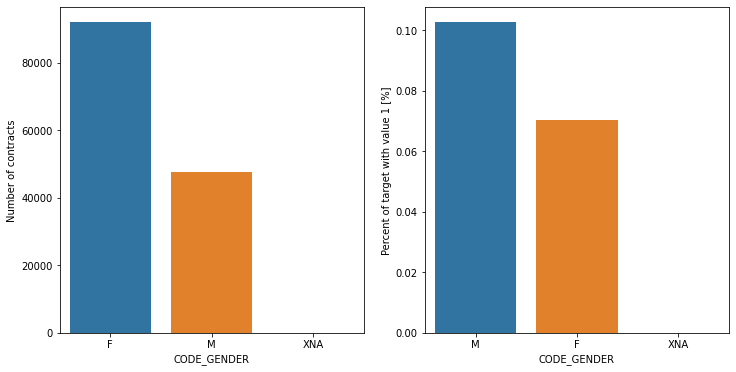

In [30]:
plot_stats('CODE_GENDER')

* **What is the job type of the clients?**

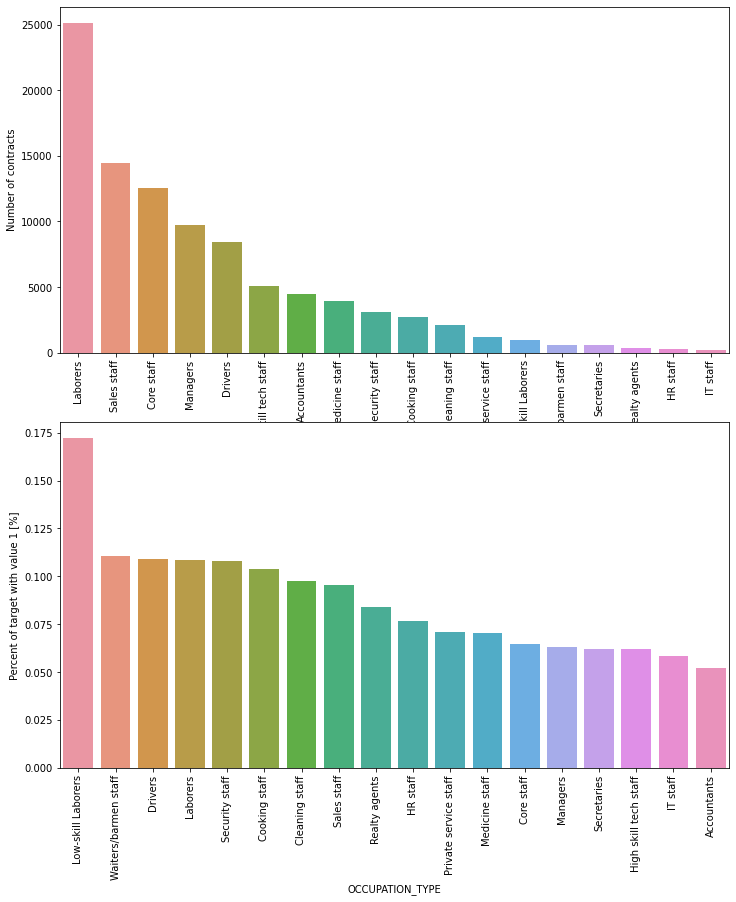

In [31]:
plot_stats('OCCUPATION_TYPE',True, False)

* **How many family members does the clients have?**

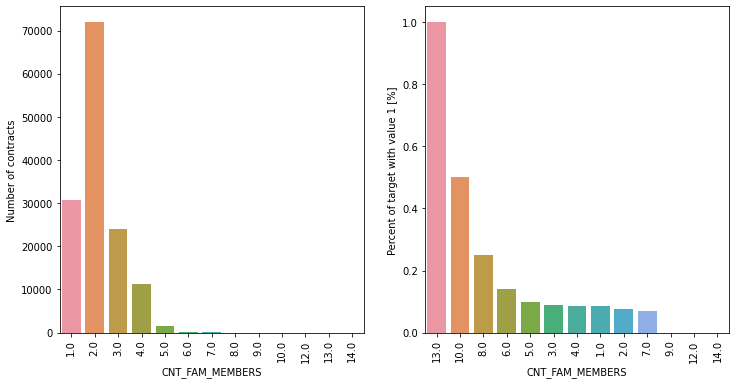

In [32]:
plot_stats('CNT_FAM_MEMBERS',True)

* **What is the job/organization type of the clients?**

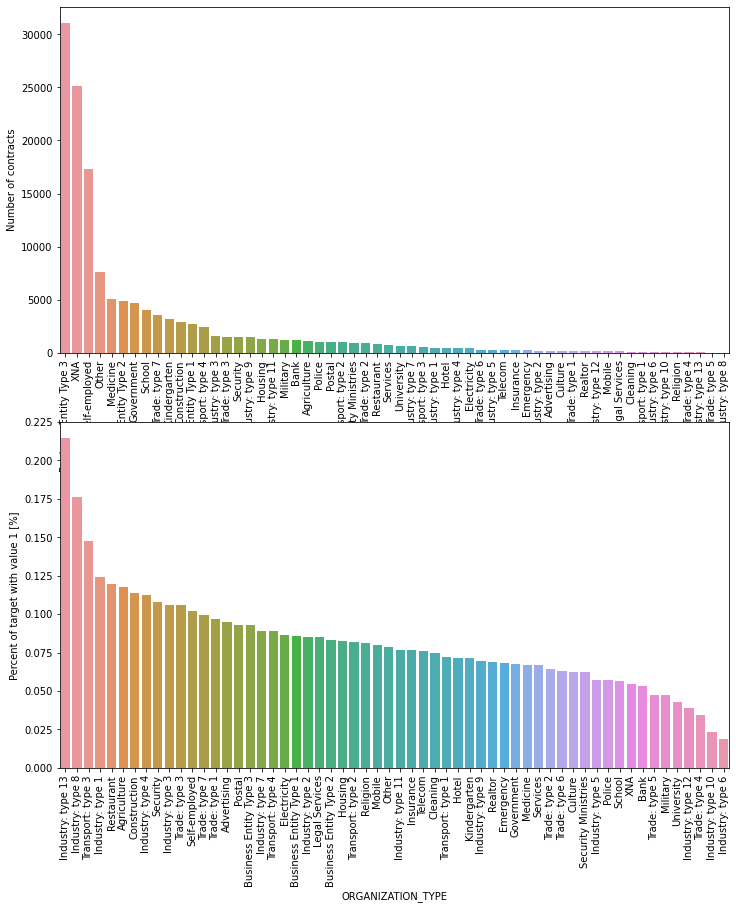

In [33]:
plot_stats('ORGANIZATION_TYPE',True, False)

* **Who was accompanying client when he was applying for the loan?**

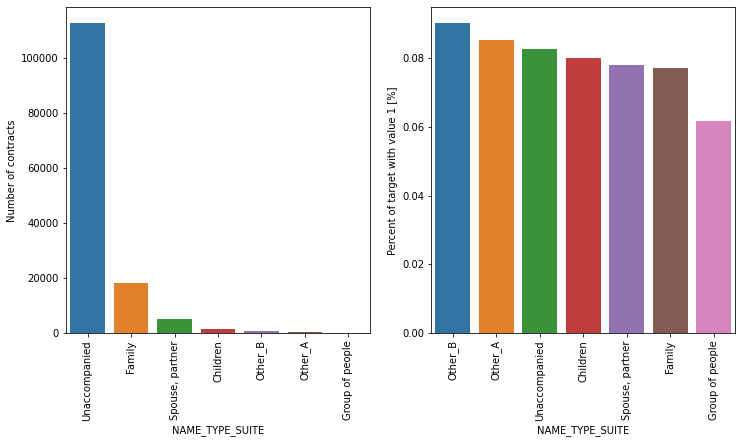

In [34]:
plot_stats('NAME_TYPE_SUITE',True)

* **What is the Clients income type (businessman, working, maternity leave?**

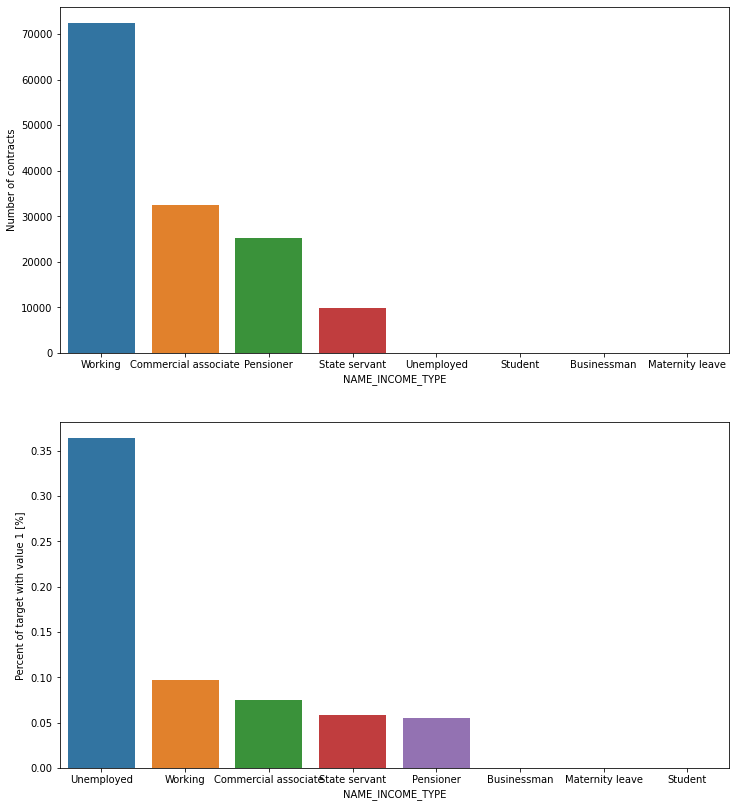

In [35]:
plot_stats('NAME_INCOME_TYPE',False,False)

**Let's also consider the distribution of some features**

In [37]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.displot(application[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

**Note: "sns.distplot" does not work well in my environment. Therefore sns.displot is used**

In [39]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application.loc[application['TARGET'] != 0]
    t0 = application.loc[application['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

* **What is the distribution of total income for the clients?**

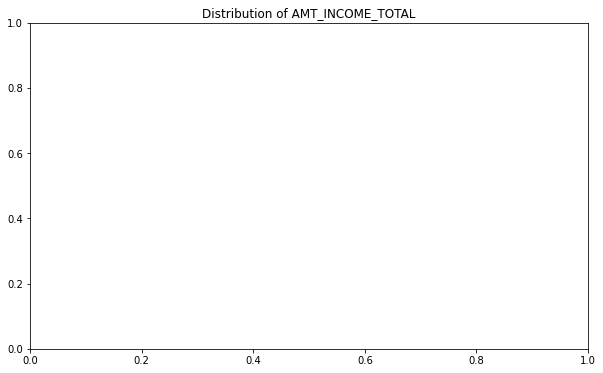

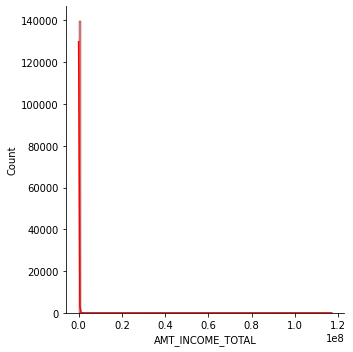

In [42]:
plot_distribution('AMT_INCOME_TOTAL','red')

* **What is the Days from birth distribution of the clients?**

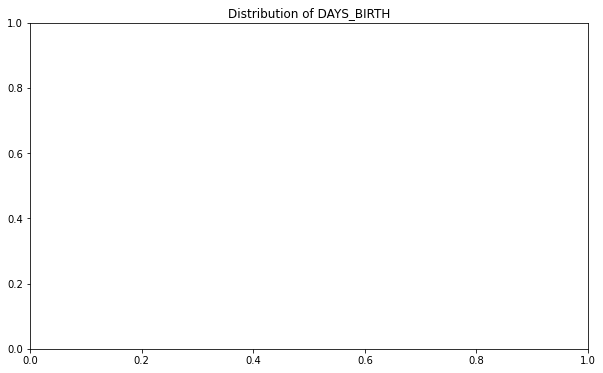

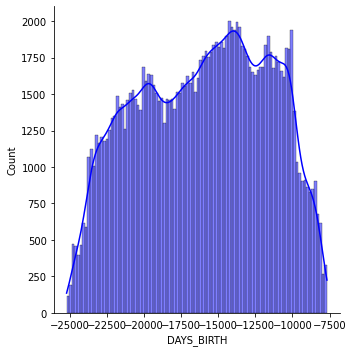

In [43]:
plot_distribution('DAYS_BIRTH','blue')

* **On which day of the week did the client apply for the loan?**

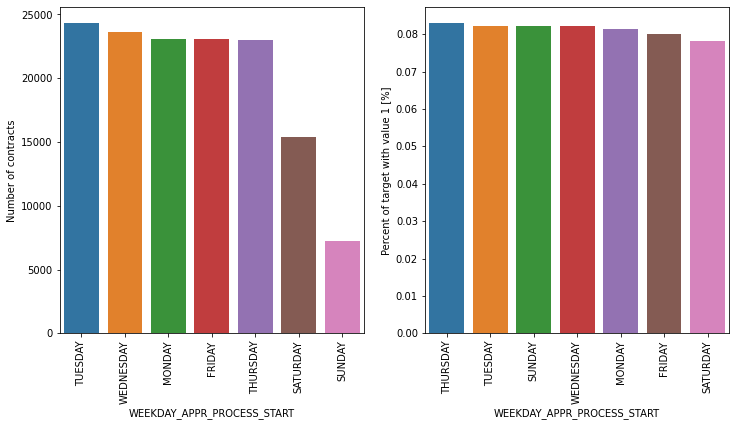

In [44]:
plot_stats('WEEKDAY_APPR_PROCESS_START','green')

* **Approximately at what hour did the client apply for the loan**

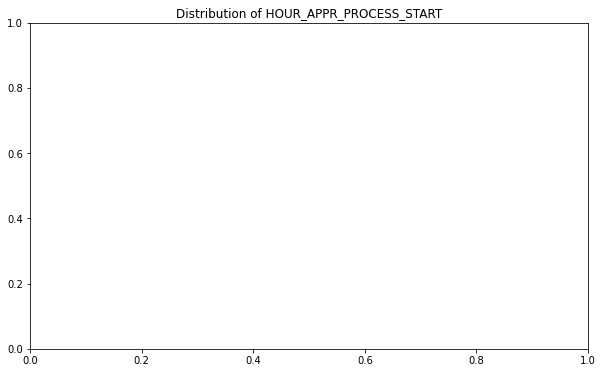

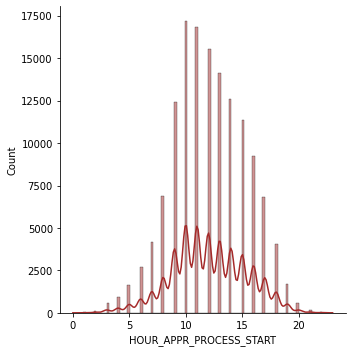

In [45]:
plot_distribution('HOUR_APPR_PROCESS_START','brown')

# **[Problem 5] (Advanced task) Posting to Notebooks**